In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [179]:
df=pd.read_csv('kabedcharb.csv', encoding='unicode_escape')
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30087 non-null  float64
 3   Direct Bilirubin                      30178 non-null  float64
 4    Alkphos Alkaline Phosphotase         29976 non-null  float64
 5    Sgpt Alamine Aminotransferase        30210 non-null  float64
 6   Sgot Aspartate Aminotransferase       30249 non-null  float64
 7   Total Protiens                        30269 non-null  float64
 8    ALB Albumin                          30237 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30171 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [181]:
df2=df.dropna()

In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27441 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    27441 non-null  float64
 1   Gender of the patient                 27441 non-null  object 
 2   Total Bilirubin                       27441 non-null  float64
 3   Direct Bilirubin                      27441 non-null  float64
 4    Alkphos Alkaline Phosphotase         27441 non-null  float64
 5    Sgpt Alamine Aminotransferase        27441 non-null  float64
 6   Sgot Aspartate Aminotransferase       27441 non-null  float64
 7   Total Protiens                        27441 non-null  float64
 8    ALB Albumin                          27441 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  27441 non-null  float64
 10  Result                                27441 non-null  int64  
dtypes: float64(9), int64

Result
1    19673
2     7768
Name: count, dtype: int64

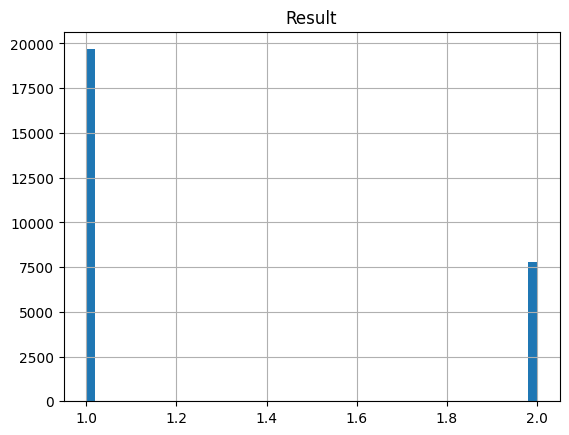

In [183]:

df2.hist(column='Result', bins=50)
df2['Result'].value_counts()

In [184]:
df2.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [185]:
X = df2[['Age of the patient',  'Total Bilirubin','Direct Bilirubin',  'Sgot Aspartate Aminotransferase','Total Protiens', 'A/G Ratio Albumin and Globulin Ratio' ]] .values.astype(float)
X[0:5]



array([[ 65.  ,   0.7 ,   0.1 ,  18.  ,   6.8 ,   0.9 ],
       [ 62.  ,  10.9 ,   5.5 , 100.  ,   7.5 ,   0.74],
       [ 62.  ,   7.3 ,   4.1 ,  68.  ,   7.  ,   0.89],
       [ 58.  ,   1.  ,   0.4 ,  20.  ,   6.8 ,   1.  ],
       [ 72.  ,   3.9 ,   2.  ,  59.  ,   7.3 ,   0.4 ]])

In [186]:
y = df2['Result'].values.astype( float)
y[0:5]

array([1., 1., 1., 1., 1.])

In [187]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.30821696, -0.42741394, -0.49790656, -0.33223347,  0.30344149,
        -0.13737726],
       [ 1.12024291,  1.18768384,  1.36868752, -0.04219116,  0.94315137,
        -0.62890464],
       [ 1.12024291,  0.61764933,  0.88475572, -0.1553784 ,  0.48621574,
        -0.16809772],
       [ 0.86961086, -0.37991106, -0.39420689, -0.32515926,  0.30344149,
         0.16982736],
       [ 1.74682306,  0.0792834 ,  0.15885803, -0.18721231,  0.76037712,
        -1.67340032]])

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (21952, 6) (21952,)
Test set: (5489, 6) (5489,)


In [190]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [191]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1., 1., 1., 2., 1.])

In [192]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9087554664723032
Test set Accuracy:  0.8710147567862999


In [193]:
k = 1
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9999088921282799
Test set Accuracy:  0.9657496811805429


In [194]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.96574968, 0.94425214, 0.9342321 , 0.91674258, 0.90526508,
       0.89069047, 0.88540718, 0.87447623, 0.87101476])

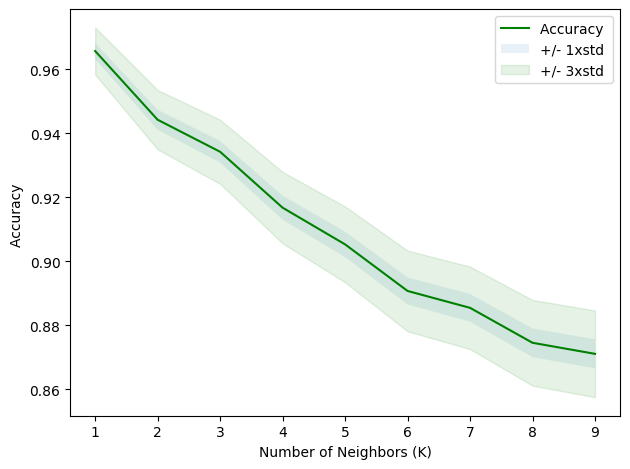

In [195]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [196]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9657496811805429 with k= 1
